1822
456
              precision    recall  f1-score   support

       Adult      0.977     0.995     0.986       383
      Senior      0.970     0.877     0.921        73

    accuracy                          0.976       456
   macro avg      0.973     0.936     0.953       456
weighted avg      0.976     0.976     0.975       456

[[381   9]
 [  2  64]]
[[381   9]
 [  2  64]]


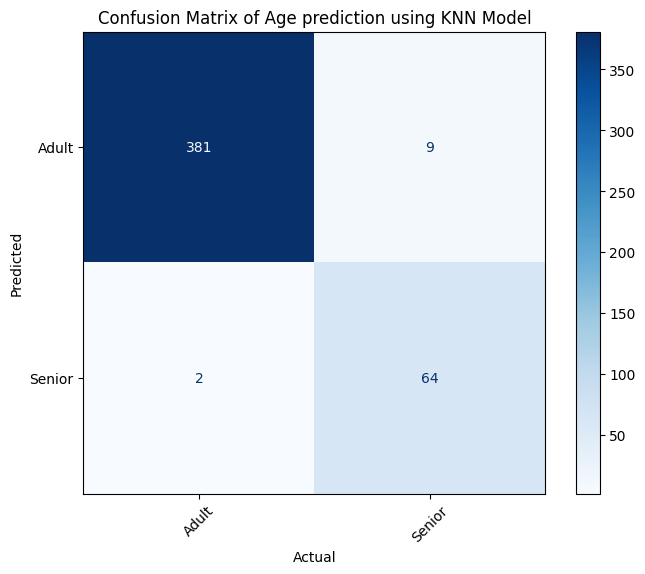

In [1]:
#Implementing KNN

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

file_path = "./agePrediction.csv"
data = pd.read_csv(file_path)

# Drop any rows with missing values
data = data.dropna()


f1 = np.array(data['RIDAGEYR'])
f2 = np.array(data['RIAGENDR'])
f3 = np.array(data['PAQ605'])
f4 = np.array(data['BMXBMI'])
f5 = np.array(data['LBXGLU'])
f6 = np.array(data['DIQ010'])
f7 = np.array(data['LBXGLT'])
f8 = np.array(data['LBXIN'])

label = np.array(data['age_group'])

########## Scaling ###########
features=list(zip(f1, f2, f3, f4, f5, f6, f7, f8))
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=0)
print(len(X_train))
print(len(X_test))

######## Get Model
k = 3 
model = KNeighborsClassifier(n_neighbors=k)
# Train the model using the training sets
model.fit(X_train, y_train)

#Predict Output
y_pred= model.predict(X_test)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = np.transpose(cm)


# Additionally, you can use classification_report for a summary
cm_report = classification_report(y_test, y_pred, digits=3)

print(cm_report)
print(cm)
print(cm)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=['Adult','Senior'])
fig, ax = plt.subplots(figsize=(8, 6))
cmd.plot(cmap='Blues', ax=ax)
cmd.ax_.set(xlabel='Actual', ylabel='Predicted', title='Confusion Matrix of Age prediction using KNN Model')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


1822
456
[[377   9]
 [  6  64]]
[[377   9]
 [  6  64]]
              precision    recall  f1-score   support

       Adult      0.977     0.984     0.980       383
      Senior      0.914     0.877     0.895        73

    accuracy                          0.967       456
   macro avg      0.945     0.931     0.938       456
weighted avg      0.967     0.967     0.967       456



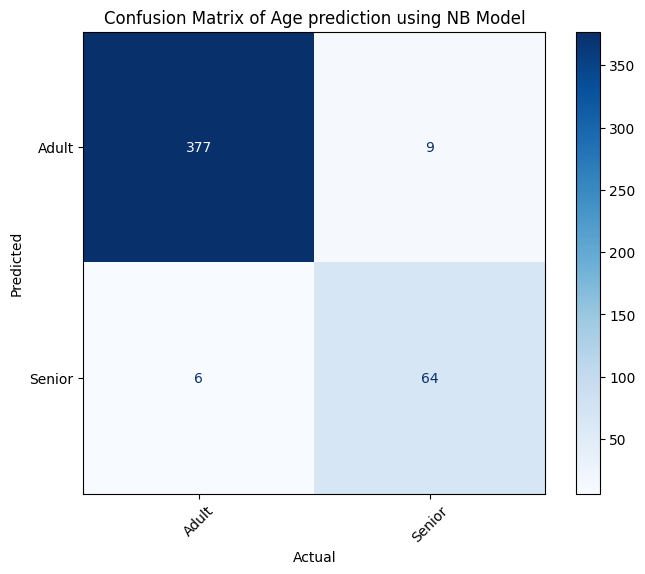

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay


file_path = "./agePrediction.csv"
data = pd.read_csv(file_path)

f1 = np.array(data['RIDAGEYR'])
f2 = np.array(data['RIAGENDR'])
f3 = np.array(data['PAQ605'])
f4 = np.array(data['BMXBMI'])
f5 = np.array(data['LBXGLU'])
f6 = np.array(data['DIQ010'])
f7 = np.array(data['LBXGLT'])
f8 = np.array(data['LBXIN'])

label = np.array(data['age_group'])

########## Scaling ###########
features=list(zip(f1, f2, f3, f4, f5, f6, f7, f8))
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=0)
print(len(X_train))
print(len(X_test))

######## Get Model
model = GaussianNB()
# Train the model using the training sets
model.fit(X_train, y_train)

#Predict Output
y_pred= model.predict(X_test)

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = np.transpose(cm)

print(cm)
print(cm)

# Additionally, you can use classification_report for a summary
cm_report = classification_report(y_test, y_pred, digits=3)
print(cm_report)


# Plot confusion matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=['Adult','Senior'])
fig, ax = plt.subplots(figsize=(8, 6))
cmd.plot(cmap='Blues', ax=ax)
cmd.ax_.set(xlabel='Actual', ylabel='Predicted', title='Confusion Matrix of Age prediction using NB Model')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()
